In [1]:
!pip install pyagrum  # permite utilizar biblioteca C++ aGrUM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 28.8 MB/s eta 0:00:00


In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pandas as pd

# Cargar y leer archivos de datos

1.   alarm.bif  
2.   dic_alarm.csv

In [4]:
#Red Bayesiana
bn = gum.loadBN("/content/drive/MyDrive/Datos/Alarm/alarm.bif") 


In [5]:
# diccionario de variables
variables = pd.read_csv('/content/drive/MyDrive/Datos/Alarm/dic_alarm.csv',
                        usecols = ['id','nombre','descripcion','categorias','clase'],
                        index_col = ['id'])
variables.shape

(37, 4)

# Exploración de la Red Bayesiana

In [6]:
#¿cuántas variables y dependencias entre variables tenemos?
print(bn)

BN{nodes: 37, arcs: 46, domainSize: 10^16.2389, dim: 509, mem: 5Ko 896o}


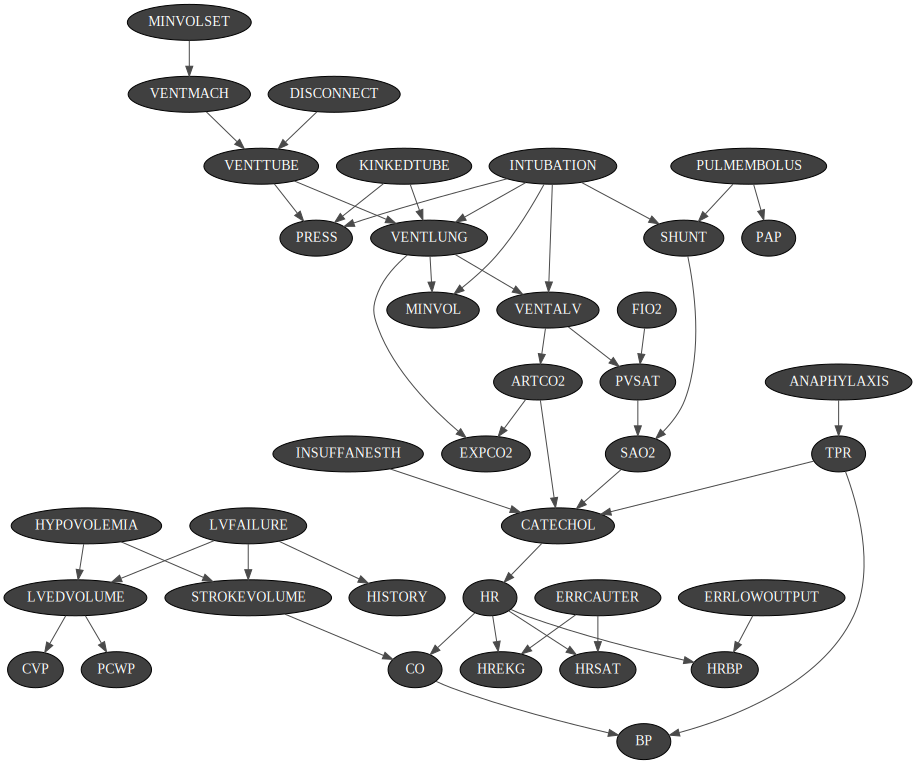

In [21]:
gnb.showBN(bn, size="20")

In [8]:
variables['clase'].value_counts()

Evidencia              16
Variables inferidas    13
Alarma                  8
Name: clase, dtype: int64

In [9]:
variables[variables['clase']=='Alarma']

,nombre,descripcion,clase,categorias
id,,,,
17,HYPOVOLEMIA,hypovolemia,Alarma,"TRUE , FALSE"
18,LVFAILURE,left ventricular failure,Alarma,"TRUE , FALSE"
19,ANAPHYLAXIS,anaphylaxis,Alarma,"TRUE , FALSE"
20,INSUFFANESTH,insufficient anesthesia/analgesia,Alarma,"TRUE , FALSE"
21,PULMEMBOLUS,pulmonary embolus,Alarma,"TRUE , FALSE"
22,INTUBATION,intubation,Alarma,"NORMAL , ESOPHAGEAL , ONESIDED"
23,KINKEDTUBE,kinked tube,Alarma,"TRUE , FALSE"
24,DISCONNECT,disconnection,Alarma,"TRUE , FALSE"


In [10]:
bn.cpt('LVFAILURE')

(pyAgrum.Potential<double>@0x3e37210) 
  LVFAILURE        |
TRUE     |FALSE    |
---------|---------|
 0.0500  | 0.9500  |

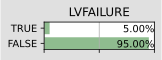

In [11]:
gnb.showPosterior(bn,evs={},target='LVFAILURE')

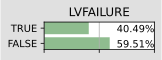

In [12]:
gnb.showPosterior(bn,evs={"CVP": "LOW"},target='LVFAILURE')

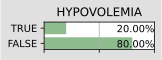

In [13]:
gnb.showPosterior(bn,evs={},
                  target='HYPOVOLEMIA')

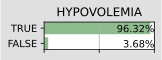

In [14]:
gnb.showPosterior(bn,evs={"CVP": "HIGH","PCWP":"HIGH", "BP":"LOW", "CO":"LOW"},
                  target='HYPOVOLEMIA')

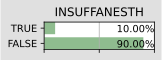

In [15]:
gnb.showPosterior(bn,evs={},
                  target='INSUFFANESTH')

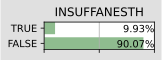

In [16]:
gnb.showPosterior(bn,evs={"HRSAT": "LOW","PCWP":"LOW", "BP":"LOW", "SAO2":"LOW"},
                  target='INSUFFANESTH')

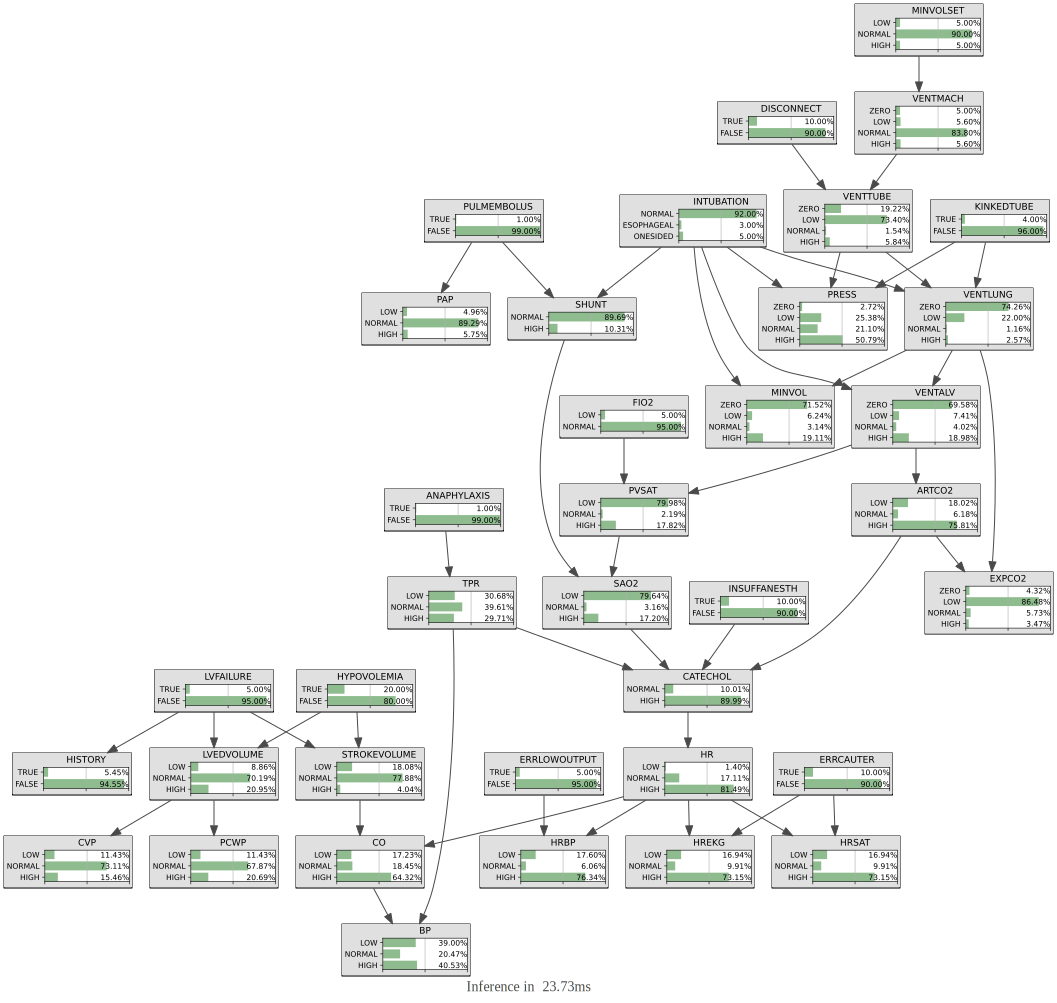

In [23]:
gnb.showInference(bn,evs={}, size=20)

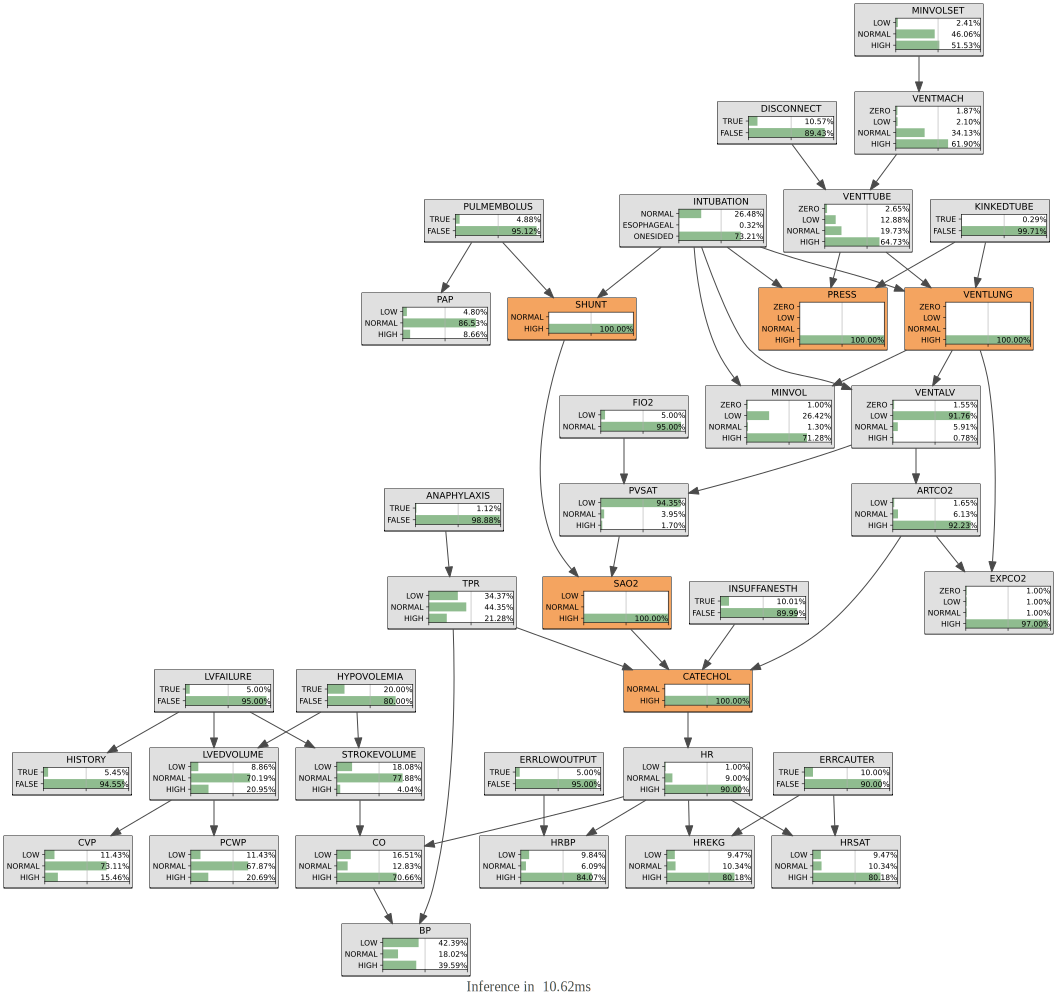

In [24]:
gnb.showInference(bn,evs={"VENTLUNG":"HIGH", "SAO2":"HIGH",
                          "PRESS": "HIGH", "CATECHOL":"HIGH",
                          "SHUNT":"HIGH"}, size=20)